<a href="https://colab.research.google.com/github/vicky1412/Predicting_stocks_using_deep_learning/blob/main/option_5m_real_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
from keras.models import load_model
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
model = load_model("/content/drive/MyDrive/Option Trading/options-5m-model.h5")

In [ ]:

def predict(data):
  # DF-->array
  data = data.values

  # Scale(0,1)
  scaler = MinMaxScaler(feature_range=(0,1))
  last_60_5m_data_scaled = scaler.fit_transform(data)

  #create x_test
  X_test = []
  X_test.append(last_60_5m_data_scaled)

  # X_test-->numpy array
  X_test = np.array(X_test)
  # Reshape
  X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

  #Predict
  current_predict = model.predict(X_test)
  current_predict = scaler.inverse_transform(current_predict)

  mse = 0 # np.sqrt(6.19342782)

  min_value = current_predict - mse
  max_value = current_predict + mse
  
  x = ''
  if data[-1] < min_value:
    x = 'Green'
  elif data[-1] > max_value:
    x = 'Red'
  
  return x,current_predict


In [ ]:
# current_data = yf.download("BTC-USD", period='7d',interval='1m')
# current_df = current_data.filter(["Close"])

# last_60_5m_data = current_df[-60:]

# candle = []
# color,current_predict = predict(last_60_5m_data)

# candle.append(color)
# for i in range(9):
#   last_60_5m_data = last_60_5m_data[1:]
#   current_predict = pd.DataFrame(current_predict, columns = ['Close'])
#   last_60_5m_data = last_60_5m_data.append(current_predict)
#   color,current_predict = predict(last_60_5m_data)
#   candle.append(color)
# df = pd.DataFrame(candle, columns = ['candle'])
# dummies = pd.get_dummies(df[['candle']])


In [ ]:
current_data = yf.download("BTC-USD", period='10d',interval='5m')
current_df = current_data.filter(["Close",'Open'])
current_df_close = current_data.filter(['Close'])
last_60_5m_data = current_df_close[-60:]

candle = []


last_10 = current_df[-10:]

for index, row in last_10.iterrows():
  if row['Close'] > row['Open']:
    x= 'Green'
  elif row['Close'] < row['Open']:
    x= 'Red'
  else:
    x= 'White'
  candle.append(x)

color,current_predict = predict(last_60_5m_data)
candle.append(color)

df = pd.DataFrame(candle, columns = ['candle'])
dummies = pd.get_dummies(df[['candle']])


dummies

[*********************100%***********************]  1 of 1 completed


,candle_Green,candle_Red,candle_White
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,1,0
6,1,0,0
7,0,1,0
8,0,1,0
9,0,0,1


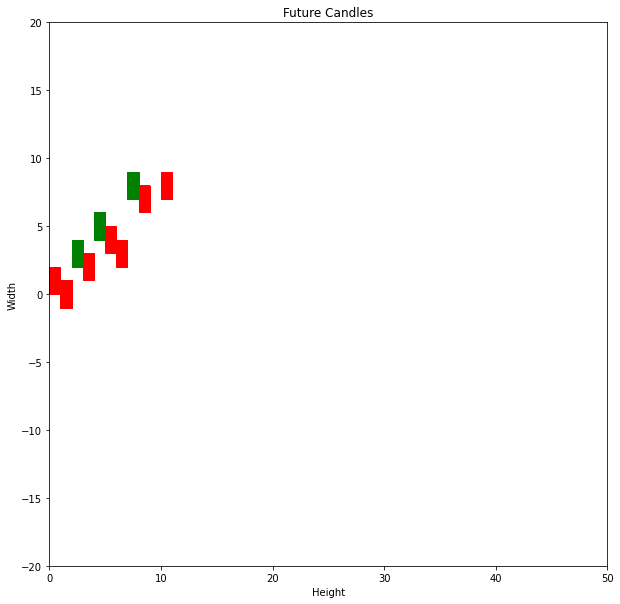

In [ ]:
# virtualize

fig, ax = plt.subplots(figsize=(10,10))

# Customize plot
ax.set(title="Future Candles", xlabel="Height", ylabel="Width")

plt.xlim([0, 50])
plt.ylim([-20, 20])

def rects(axx,ayy,cancolor):
  rect = matplotlib.patches.Rectangle((axx, ayy),
                                      1, 2,
                                      color =cancolor)
  return rect

for index, row in dummies.iterrows():
  axx = index
  if row["candle_Green"] == 1:
    ayy = index
    cancolor = 'Green'
    rect = rects(axx,ayy,cancolor)
    ax.add_patch(rect)
  elif row["candle_Red"] == 1:
    ayy = index if axx == 0 else (ayy-1)
    cancolor = 'Red'
    rect = rects(axx,ayy,cancolor)
    ax.add_patch(rect)
  else:
    ayy = index-1
    cancolor = 'White'
    rect = rects(axx,ayy,cancolor)
    ax.add_patch(rect)
  


